<a href="https://colab.research.google.com/github/robertapassarelli/QME_projectwork/blob/master/project_qme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Group H 
# Project work - QME 

In [0]:
import pandas as pd 
import numpy as np
import io 
from google.colab import files # to save and read the csv file 
import matplotlib.pyplot as plt

In [61]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['eter_data.csv']), sep=";", header = 0, encoding='latin-1')
data_clean = pd.read_csv(io.BytesIO(uploaded['clean_data.csv']), sep=",", header = 0, encoding='latin-1')
# Dataset is now stored in a Pandas Dataframe

Saving eter_data.csv to eter_data.csv
Saving clean_data.csv to clean_data.csv


In [62]:
data.head()

,ETER ID Year,ETER ID,National identifier,Institution Name,Country Code,Region of establishment (NUTS 2),Total Current expenditure (EURO),Basic government allocation (EURO),Student fees funding (EURO),Total Current revenues (EURO),Research active institution,Students enrolled at ISCED 8 - men,Students enrolled at ISCED 8 - women,Students enrolled ISCED 8 - gender unclassified,Total students enrolled at ISCED 8,Graduates at ISCED 8 - men,Graduates at ISCED 8 - women,Total graduates at ISCED 8,R&D Expenditure (EURO),PhD intensity
0,FI0001.2016,FI0001,FI0001,Helsingin yliopisto,FI,FI1B,657907048,412436889,a,673420595,1,1785,2892,0,4677,215,338,553,335715100,"0,1013006045"
1,FI0002.2016,FI0002,FI0002,Turun yliopisto,FI,FI1C,257287148,166998500,a,264748916,1,788,1185,0,1973,72,108,180,121880500,"0,054446461"
2,FI0003.2016,FI0003,FI0003,Åbo Akademi,FI,FI1C,99747199,60701853,a,103015362,1,332,391,0,723,36,38,74,41158600,"0,0631938514"
3,FI0004.2016,FI0004,FI0004,Oulun yliopisto,FI,FI1D,215921256,145611000,a,215939884,1,601,681,0,1282,96,103,199,119658200,"0,0732155997"
4,FI0005.2016,FI0005,FI0005,Tampereen yliopisto,FI,FI19,177860004,110029264,a,179016548,1,604,1047,0,1651,53,87,140,84259500,"0,0693069307"


In [63]:
data_clean.head()

,Unnamed: 0,ETER ID Year,ETER ID,National identifier,Institution Name,Country Code,Region of establishment (NUTS 2),Total Current expenditure (EURO),Basic government allocation (EURO),Student fees funding (EURO),Total Current revenues (EURO),Research active institution,Students enrolled at ISCED 8 - men,Students enrolled at ISCED 8 - women,Students enrolled ISCED 8 - gender unclassified,Total students enrolled at ISCED 8,Graduates at ISCED 8 - men,Graduates at ISCED 8 - women,Total graduates at ISCED 8,R&D Expenditure (EURO),PhD intensity
0,0,FI0001.2016,FI0001,FI0001,Helsingin yliopisto,FI,FI1B,657907048,412436889,NaN,673420595,1,1785.0,2892.0,0.0,4677.0,215.0,338.0,553.0,335715100,"0,1013006045"
1,1,FI0002.2016,FI0002,FI0002,Turun yliopisto,FI,FI1C,257287148,166998500,NaN,264748916,1,788.0,1185.0,0.0,1973.0,72.0,108.0,180.0,121880500,"0,054446461"
2,2,FI0003.2016,FI0003,FI0003,Ã bo Akademi,FI,FI1C,99747199,60701853,NaN,103015362,1,332.0,391.0,0.0,723.0,36.0,38.0,74.0,41158600,"0,0631938514"
3,3,FI0004.2016,FI0004,FI0004,Oulun yliopisto,FI,FI1D,215921256,145611000,NaN,215939884,1,601.0,681.0,0.0,1282.0,96.0,103.0,199.0,119658200,"0,0732155997"
4,4,FI0005.2016,FI0005,FI0005,Tampereen yliopisto,FI,FI19,177860004,110029264,NaN,179016548,1,604.0,1047.0,0.0,1651.0,53.0,87.0,140.0,84259500,"0,0693069307"


In [64]:
variables = data.columns # variables choosen from ETER 
variables

Index(['ETER ID Year', 'ETER ID', 'National identifier', 'Institution Name',
       'Country Code', 'Region of establishment (NUTS 2)',
       'Total Current expenditure (EURO)',
       'Basic government allocation (EURO)', 'Student fees funding (EURO)',
       'Total Current revenues (EURO)', 'Research active institution',
       'Students enrolled at ISCED 8 - men',
       'Students enrolled at ISCED 8 - women',
       'Students enrolled ISCED 8 - gender unclassified',
       'Total students enrolled at ISCED 8', 'Graduates at ISCED 8 - men',
       'Graduates at ISCED 8 - women', 'Total graduates at ISCED 8',
       'R&D Expenditure (EURO)', 'PhD intensity'],
      dtype='object')

In [0]:
data_clean.isna().values.any() # To check the presence of null values
data_clean0 = data_clean.fillna(0) 

In [69]:
data_clean0.isna().values.any()

False

In [68]:
set(data_clean0["Country Code"]) # These are the contries considered 
# Finland, Norway, Sweden, Italy 

{'FI', 'IT', 'NO', 'SE'}

In [0]:
tot_stud_enrolled_men = data_clean0.groupby(['Country Code'])['Students enrolled at ISCED 8 - men'].sum()
tot_stud_enrolled_wom = data_clean0.groupby(['Country Code'])['Students enrolled at ISCED 8 - women'].sum()

In [96]:
tot_stud_enrolled_wom

Country Code
FI    62533.0
IT    99123.0
NO    29701.0
SE    61152.0
Name: Students enrolled at ISCED 8 - women, dtype: float64

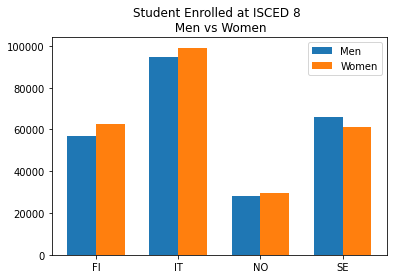

In [100]:
labels = ['FI', 'IT', 'NO', 'SE']
men_means = list(tot_stud_enrolled_men)
women_means = list(tot_stud_enrolled_wom)

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Student Enrolled at ISCED 8 \n Men vs Women')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()